In [3]:
import tensorflow as tf
from   tensorflow.keras import datasets,layers,models,optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

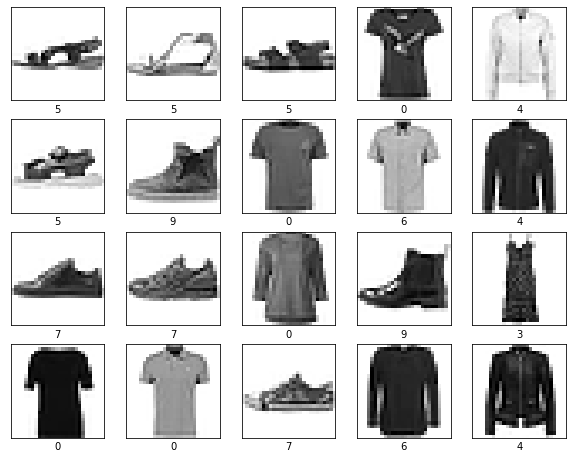

In [5]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    a=np.random.randint(0,60000)
    plt.imshow(x_train[a],plt.cm.binary)
    plt.xlabel(y_train[a])
plt.show()

In [6]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [7]:
input_layer    = layers.Input((28,28))
first_layer   = layers.Flatten()(input_layer)
second_layer   = layers.Dense(128,activation='relu')(first_layer)
output_layer   = layers.Dense(10,activation='softmax')(second_layer)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizers.Adam(lr=0.001),loss="sparse_categorical_crossentropy",metrices=["accuracy"])

In [9]:
class cb(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs['loss']<=0.10):
            self.model.stop_training=True


In [10]:
tcb = cb()

In [13]:
ttb = tf.keras.callbacks.TensorBoard(log_dir='log2',
                                       histogram_freq=2,
                                       write_images=True)

In [14]:
param_perf=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[tcb,ttb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2811 - val_loss: 0.3388
Epoch 2/50
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2700 - val_loss: 0.3420
Epoch 3/50
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2581 - val_loss: 0.3481
Epoch 4/50
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2509 - val_loss: 0.3406
Epoch 5/50
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2399 - val_loss: 0.3347
Epoch 6/50
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2338 - val_loss: 0.3698
Epoch 7/50
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2247 - val_loss: 0.3564
Epoch 8/50
60000/60000 [==============================] - 12s 197us/sample - loss: 0.2182 - val_loss: 0.3542
Epoch 9/50
60000/60000 [==============================] - 13s 209us/sample - l